### **Preparation**


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import math
import csv
from collections import deque
from google.colab import files

### **Input Data**
load the training data file
each row $\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}$ of the data consists of a 2-dimensional point $(x, y)$ with its label $l$  
$x, y \in \mathbb{R}$ and $l \in \{0, 1\}$

In [3]:
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


In [10]:
data = np.genfromtxt("data-nonlinear.txt", delimiter=',')
x = data[:, 0]
y = data[:, 1]
label = data[:, 2]
x_label0 = x[label == 0]
x_label1 = x[label == 1]
y_label0 = y[label == 0]
y_label1 = y[label == 1]

train_costs = deque()
iters = deque()
accuracys = deque()
theta_0s = deque()
theta_1s = deque()
theta_2s = deque()
theta_3s = deque()
theta_4s = deque()
theta_5s = deque()

#print(label[57])
#print(label[58])
#print(type(x))
#print(y_label0)
#print(type(x_label0))
print(len(x)) #118
#print(y)
#print(label)
print(len(x_label0)) #60
print(len(x_label1)) #58

118
60
58


### **Logistic Regression**
1) non-Linear Model
<br>
$\ z =  g(x, y; \theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 + \theta_5y^2  $  
$\sigma(z) = \frac{1}{1 + \exp(-z)}$
<br>  
2) Objective Function
<br>
$J(\theta) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(g(x^{(i)}, y^{(i)}; \theta))) - (1 - l^{(i)}) \log(1 - \sigma(g(x^{(i)}, y^{(i)}; \theta)))  )$
<br>  
3) Gradient Descent
<br>
$\theta_{k}^{(t+1)} = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(g(x^{(i)}, y^{(i)}; \theta)) - l^{(i)}) \frac{\partial g(x^{(i)}, y^{(i)}; \theta^{(t)})}{\partial \theta_{k}}$, for all $k$  
<br>
4) HyperParameters Setting
<br>
$\ \theta_0^{(0)} = 10$  
$\ \theta_1^{(0)} = 10$  
$\ \theta_2^{(0)} = 10$  
$\ \theta_3^{(0)} = 1$  
$\ \theta_4^{(0)} = 1$  
$\ \theta_5^{(0)} = 1$  
$\ lr = 6*10^{-3}$



In [0]:
def sigmoidFunction(z):
  result = 1/(1 + np.exp(-z))
  return result

In [0]:
def objectiveFunction(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5):
  cost = 0
  predictions = deque()
  for i in range(0, 118):
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i] + theta_3 * x_data[i] * y_data[i] + theta_4 * np.power(x_data[i],2) + theta_5 * np.power(y_data[i],2)) 
    #print(estimate)
    #print("Estimate",estimate)
    predictions.append((-class_data[i]*np.log(estimate)) - (1-class_data[i])*np.log(1-estimate))
    #print("predictions",predictions)
  cost = np.sum(predictions) / 118
  #print("Cost출력",cost)
  return cost

In [0]:
def gradientDescent(x_data, y_data, class_data, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5):
  for i in range(0, 118):
    lr = 6e-3
    estimate = sigmoidFunction(theta_0 + theta_1 * x_data[i] + theta_2 * y_data[i] + theta_3 * x_data[i] * y_data[i] + theta_4 * np.power(x_data[i],2) + theta_5 * np.power(y_data[i],2) ) - class_data[i]
    theta_0 -= lr * estimate / 118
    theta_1 -= lr * estimate * x_data[i] / 118
    theta_2 -= lr * estimate * y_data[i] / 118
    theta_3 -= lr * estimate * x_data[i] * y_data[i] / 118
    theta_4 -= lr * estimate * np.power(x_data[i],2) / 118
    theta_5 -= lr * estimate * np.power(y_data[i],2) / 118
  return theta_0, theta_1, theta_2, theta_3, theta_4, theta_5

Plotting the Estimated Parameters


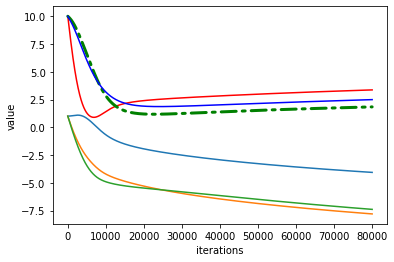

In [0]:
def main():
  theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 10, 10, 10, 1, 1, 1  #Initialization
  
  for iter in range(0, 80000):
    theta_0s.append(theta_0)
    theta_1s.append(theta_1)
    theta_2s.append(theta_2)
    theta_3s.append(theta_3)
    theta_4s.append(theta_4)
    theta_5s.append(theta_5)
    
    check = 0
    for i in range(0, 57):
      if theta_0 + theta_1 * x[i] + theta_2 * y[i] + theta_3 * x[i] * y[i] + theta_4 * np.power(x[i],2) + theta_5 * np.power(y[i],2) >= 0:
        check += 1
    for i in range(58, 118):
      if theta_0 + theta_1 * x[i] + theta_2 * y[i] + theta_3 * x[i] * y[i] + theta_4 * np.power(x[i],2) + theta_5 * np.power(y[i],2)  < 0:
        check += 1
    accuracy = check / 118 * 100
    accuracys.append(accuracy)

    train_value = objectiveFunction(x, y, label, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5)
    #train data 수집
    train_costs.append(train_value)
    theta_0, theta_1, theta_2, theta_3, theta_4 ,theta_5= gradientDescent(x, y, label, theta_0, theta_1, theta_2, theta_3, theta_4, theta_5)
    iters.append(iter)

    #print("thetas",theta_0,theta_1,theta_2,theta_3,theta_4)
  
  print("Plotting the Estimated Parameters")
  fig = plt.figure()
  graph1 = plt.plot(iters, theta_0s, 'r')
  graph2 = plt.plot(iters, theta_1s, 'g', linewidth = 3, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
  graph3 = plt.plot(iters, theta_2s, 'b')
  graph4 = plt.plot(iters, theta_3s)
  graph5 = plt.plot(iters, theta_4s)
  graph6 = plt.plot(iters, theta_5s)
  plt.xlabel('iterations')
  plt.ylabel('value')
  plt.show()
  
"""
  print("Plotting the Training Error")
  plt.plot(iters, train_costs, 'b')
  plt.xlabel('iteration')
  plt.ylabel('Traing Error')
  plt.show()

  print("Plotting the Training Accuracy")
  plt.plot(iters, accuracys, 'r')
  plt.xlabel('iteration')
  plt.ylabel('Training Accuracy')
  plt.show()

  print("Final Training Accuracy : ",accuracys[-1],"%")

  print(theta_0, theta_1, theta_2)

  print("Plotting the Obtained Classifer")
  points = np.arange(30,100,0.5)
  xs,ys = np.meshgrid(points, points)
  z = theta_0 + theta_1 * xs + theta_2 * ys
  z = sigmoidFunction(z)

  fig = plt.figure()
  plt.xlim([30,100])
  plt.ylim([30,100])
  graph4 = plt.imshow(z, cmap=plt.cm.bwr)
  graph5 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
  graph6 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
  plt.show()
"""
if __name__ == "__main__":
  main()

### **1. Plot the training data**

Plotting the training data


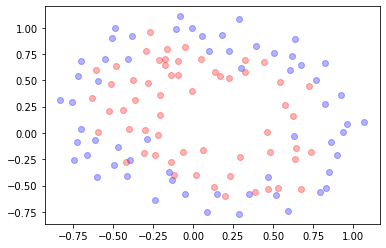

In [11]:
print("Plotting the training data")
plt.figure()
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

### **2. Define High dimensional Function**
$\ g(x, y; \theta) = \theta_0 + \theta_1x + \theta_2y + \theta_3xy + \theta_4x^2 + \theta_5y^2  $  

### **3. Plotting the Training Error**

Plotting the Training Error


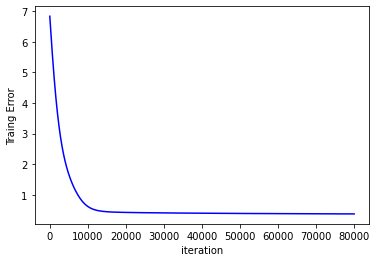

In [0]:
print("Plotting the Training Error")
plt.plot(iters, train_costs, 'b')
plt.xlabel('iteration')
plt.ylabel('Traing Error')
plt.show()

### **4. Plotting the Training Accuracy**

Plotting the Training Accuracy


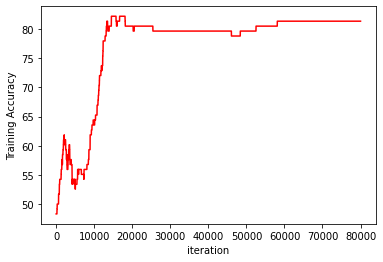

In [0]:
print("Plotting the Training Accuracy")
plt.plot(iters, accuracys, 'r')
plt.xlabel('iteration')
plt.ylabel('Training Accuracy')
plt.show()

### **5. Final Training Accuracy**

In [0]:
print("Final Training Accuracy : ",accuracys[-1],"%")

Final Training Accuracy :  81.35593220338984 %


### **6. Plotting the Optimal Classifer superimposed on the Training Data**

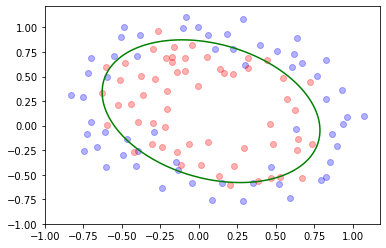

In [0]:
theta_0 = theta_0s[-1]
theta_1 = theta_1s[-1]
theta_2 = theta_2s[-1]
theta_3 = theta_3s[-1]
theta_4 = theta_4s[-1]
theta_5 = theta_5s[-1]

Xmesh, Ymesh = np.meshgrid(np.linspace(-1.0, 1.0, 300), np.linspace(-1.0, 1.0, 300))

Z= theta_0 + theta_1 * Xmesh + theta_2 * Ymesh + theta_3 * Xmesh*Ymesh + theta_4 * Xmesh**2 + theta_5 * Ymesh**2
fig = plt.figure()
levels = [0]
grpah7 = plt.contour(Xmesh, Ymesh, Z, levels, colors = 'green')
graph8 = plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
graph9 = plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()